<a href="https://colab.research.google.com/github/adeeeeelahmed/Codexcue/blob/main/Simple_Linear_Regression_on_Tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Loading Data:

In [5]:
data = {
    'total_bill': [
        16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58,
        10.33, 16.29, 16.97, 20.65, 17.92, 20.29, 15.77, 19.82, 17.81, 13.37, 12.69, 21.7, 19.65, 9.55, 18.35, 15.06,
        20.69, 17.78, 24.06, 16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94, 9.68, 30.4, 18.29, 22.23, 28.55, 18.04,
        12.54, 10.29, 34.81, 9.94, 25.56, 19.49, 38.01, 26.41, 11.24, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 16.45,
        3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28, 14.73, 10.51, 17.92, 27.2, 22.76, 17.29, 19.44, 16.66, 10.07,
        32.68, 15.98, 34.83, 13.03, 18.28, 21.16, 28.97, 22.49, 5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01, 12.46,
        11.35, 15.38, 44.3, 22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14, 7.25, 38.07, 23.95, 25.71, 17.31,
        29.93, 10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8, 8.52, 14.52, 11.38, 22.82, 19.08, 20.27,
        11.17, 12.26, 18.26, 8.51, 10.33, 14.15, 16, 13.16, 17.47, 41.19, 27.05, 16.43, 8.35, 18.64, 11.87, 9.78, 7.51,
        14.07, 13.13, 17.26, 24.55, 19.77, 29.85, 48.17, 25, 13.39, 16.49, 21.5, 12.66, 16.21, 13.81, 17.51, 24.52,
        20.76, 31.71, 10.59, 10.63, 15.81, 7.25, 31.85, 16.82, 32.9, 17.89, 14.48, 9.6, 34.63, 34.65, 23.33, 45.35,
        40.55, 20.69, 20.9, 30.46, 18.15, 23.1, 15.69, 19.81, 28.44, 15.48, 16.58, 7.56, 10.34, 43.11, 13, 13.51,
        18.71, 12.74, 13, 16.4, 20.53, 16.47, 26.59, 38.73, 24.27, 12.76, 30.06, 25.89, 13.27, 12.9, 28.15, 11.59,
        7.74, 30.14, 12.16, 13.42, 8.58, 15.98, 13.42, 16.27, 10.09, 20.45, 13.28, 22.12, 24.01, 15.69, 11.61, 10.77,
        15.53, 10.07, 12.6, 32.83, 35.83, 27.18, 22.67, 17.82, 18.78
    ],
    'tip': [
        1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2, 3.12, 1.96, 3.23, 1.71, 5, 1.57, 3, 3.02, 3.92, 1.67, 3.71, 3.5, 3.35,
        4.08, 2.75, 2.23, 3.18, 2.34, 2, 2, 4.3, 3, 1.45, 2.5, 3, 2.45, 3.27, 3.6, 2, 3.07, 2.31, 5, 2.24, 2.54, 3.06,
        1.32, 5.6, 3, 5, 2.05, 3, 2.5, 2.6, 5.2, 1.56, 4.34, 3.51, 3, 1.5, 1.76, 3.21, 2, 1.98, 3.76, 2.64, 3.15, 2.47,
        1, 2.01, 2.09, 1.97, 3, 3.14, 5, 2.2, 1.25, 3.08, 4, 3, 2.71, 3, 3.4, 1.83, 5, 2.03, 5.17, 2, 4, 3, 3, 3.5, 1,
        4.3, 3.25, 4.73, 4, 1.5, 3, 1.5, 2.5, 3, 2.5, 3.48, 4.08, 1.64, 4.06, 4.29, 3.76, 4, 3, 1, 4, 2.55, 4, 3.5,
        5.07, 1.5, 1.8, 2.92, 2.31, 1.68, 2.5, 2, 2.52, 4.2, 1.48, 2, 2, 2.18, 1.5, 2.83, 1.5, 2, 3.25, 1.25, 2, 2, 2,
        2.75, 3.5, 5, 5, 2.3, 1.5, 1.36, 1.63, 1.73, 2, 2.5, 2, 2.74, 2, 2, 5.14, 5, 3.75, 2.61, 2, 3.5, 2.5, 2, 2, 3,
        3.48, 2.24, 4.5, 1.61, 2, 3.16, 5.15, 3.18, 4, 3.11, 2, 2, 4, 3.55, 3.68, 5.65, 3.5, 3, 5, 3.5, 2, 3.5, 4, 1.5,
        4.19, 2.56, 2.02, 4, 1.44, 2, 5, 2, 2, 4, 2.01, 2, 2.5, 4, 3.23, 3.41, 3, 2.03, 2.23, 2, 5.16, 2.5, 1.1, 3, 1.5,
        1.44, 3.09, 2.2, 3.48, 1.92, 3, 1.58, 2.5, 2, 3, 2.72, 2.88, 2, 3, 3.39, 1.47, 3, 1.25, 1, 1.17, 4.67, 2, 2,
        1.75, 3
    ]
}

Data Frame Creation: Training and Testing Sets

In [6]:
df = pd.DataFrame(data)

X = df[['total_bill']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Model:

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predictiing Tips and Evaluating Model:

In [8]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8006932905007028
R-squared: 0.23736847838508124


Scatter Plot with Regression Line:

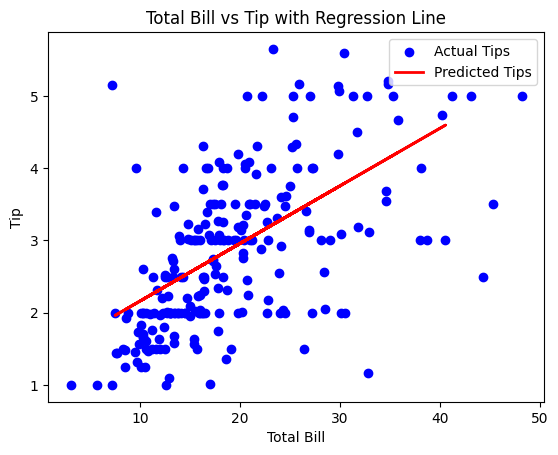

In [9]:
plt.scatter(X, y, color='blue', label='Actual Tips')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Tips')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip with Regression Line')
plt.legend()
plt.show()